In [2]:
import numpy as np
import matplotlib.pyplot as plt
mu_e = 398600e9
%config InlineBackend.figure_format = 'retina'

In [3]:
def velocity_circular(mu, r):
    """
    returns velocity on a circular orbit
    """
    return np.sqrt(mu/r)

def velocity_elliptical(mu, r, a):
    """
    returns velocity at a point on an elliptical orbit
    """
    frac1 = 2/r
    frac2 = 1/a
    factor = frac1 - frac2
    squared = factor * mu
    return np.sqrt(squared)

def delta_v(v_ex, m_o, m_b):
    """
    change in speed for mass burned and exhaust velocity
    """
    frac = m_o / m_b
    return v_ex * np.log(frac)

def time_period(a, mu):
    """
    time period from semi-major axis for a full orbit
    """
    frac = (a ** 3)/mu
    root = np.sqrt(frac)
    return 2 * np.pi * root

def hohmann_transfer(r_1, r_2, mu):
    v_1 = velocity_circular(mu, r_1)

    v_2 = velocity_circular(mu, r_2)

    a_t = (r_1 + r_2)/2

    v_tp = velocity_elliptical(mu, r_1, a_t)
    dv_tp = abs(v_tp - v_1)

    v_ta = velocity_elliptical(mu, r_2, a_t)
    dv_ta = abs(v_2 - v_ta)

    dv = dv_tp + dv_ta

    time = time_period(a_t, mu)/2
    return (v_1, v_2, a_t, v_tp, dv_tp, v_ta, dv_ta, dv, time)

def hohmann_print(r_1, r_2, mu):
    (v_1, v_2, a_t, v_tp, dv_tp, v_ta, dv_ta, dv, time) = hohmann_transfer(r_1, r_2, mu)
    out = f"for a hohmann transfer from {r_1}m to {r_2}m with mu as {mu}:\n"
    out += f"initial velocity is {v_1} meters per second, final velocity is {v_2} meters per second\n"
    out += f"transfer semi-major axis is {a_t} meters\n"
    out += f"velocity at tranfer periapsis is {v_tp} meters per second and velocity at tranfer apoapsis is {v_ta} meters per second\n"
    out += f"Delta V for transfer apoapsis and periapsis are {dv_ta} and {dv_tp} meters per second\n"
    out += f"total delta V is {dv} meters per second\n"
    out += f"the time on the transfer orbit is {time} seconds / {time/60} minutes / {time/3600} hours"
    print(out)
    
def orbit(a, e):
    theta = np.linspace(0,2*np.pi, 360)
    r = a*((1-e**2))/(1+e*np.cos(theta))
    return zip(*zip(theta, r))

def burn_mass(dv):
    v_ex = g_o * I_sp
    x = np.e**(dv/v_ex)
    return (x-1)/x

# numerical calculations

In [4]:
"""
these are all taken from the coursework breifing slides
"""
g_o = 9.81 # gravity on earth's surface
tau_e = 86400 # 1 earth day in seconds
r_e = 149598000e3 # distance from earth to sun in meters
r_j = 778479000e3 # distance from jupiter to sun in meters
r_io = 421800e3 # distance from jupiter to io in meters
mu_s = 1.327e20 # mu for sun
mu_j = 1.26687e17 # mu for jupiter
R_j = 69173e3 # radius of jupiter in meters
R_io = 1821.5e3 # radius of io in meters
r_pj = 1.06 * R_j # perijove radius for hyperbolic and jupiter science orbits
r_aj = 9 * R_j # apojove radius for jupiter science orbit
V_pj = 59.054e3 # velocity at perijove after hohmann transfer
I_sp = 320 # specific impulse of the engine
r_ai = r_io + R_io + 1200e3 # radius of Io science orbit 
r_pD = R_j - 100e3 # periapsis of disposal orbit

# answers to questions
q1: what is the distance between earth and jupiter when the transfer is done?
<br>
a1: $811909029504.5212m$ or $811909029.52km$
<br>
<br>
q2: what is the duration of the transfer?
<br>
a2: $2.7$ years or $997.77$ days
<br>
<br>
q3: $\Delta V$ for jupiter insertion
<br>
a3: $3.45kms^{-1}$
<br>
<br>
q4: fuel mass for q3
<br>
a4: $M_f = 0.67M_o$
<br>
<br>
q5: how long does the burn take for q4
<br>
a5: not done yet
<br>
<br>
q6: $\Delta V$ for Io intercept burn
<br>
a6: $1.32kms^{-1}$
<br>
<br>
q7: fuel burned for q6
<br>
a7: $0.24M_o$
<br>
<br>
q8: $\Delta V$ for disposal orbit
<br>
a8: $0.237kms^{-1}$
<br>
<br>
q9: fuel mass for q8
<br>
a9: $0.0726M_o$
<br>
<br>
q10: assuming $25kg$ for jupiter science and $25kg$ for io science how much fuel do you need

$\frac{\rho V_\infty^2}{2}$
$\alpha$

5.203806200617655


Text(0, 0.5, 'intensity $kW$')

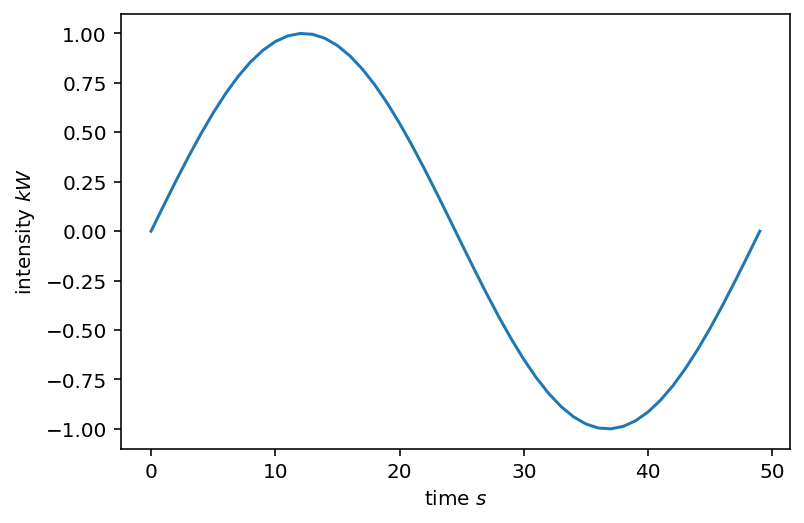

In [5]:
"""
calculating semi-major axis and eccentricity for the transfer
"""
a_t = (r_e + r_j)/2
e_t = (r_j/a_t)-1
print(r_j/r_e)
plt.plot(np.sin(np.linspace(0,2*np.pi)))
plt.xlabel(r"time $s$")
plt.ylabel(r"intensity $kW$")

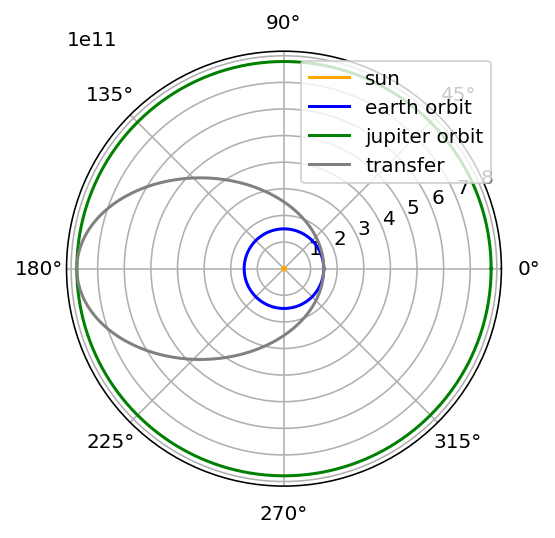

In [6]:
"""
little diagram of what the transfer looks like
"""
plt.polar(*orbit(5e9, 0), color="orange", label="sun")
plt.polar(*orbit(r_e, 0), color="blue", label="earth orbit")
plt.polar(*orbit(r_j, 0), color="green", label="jupiter orbit")
plt.polar(*orbit(a_t, e_t), color="gray", label="transfer")
plt.legend()

this shows the hohmann transfer from earth to jupiter

In [7]:
"""
function to answer q2
"""
(v_1, v_2, a_t, v_tp, dv_tp, v_ta, dv_ta, dv, time) = hohmann_transfer(r_e, r_j, mu_s)
hohmann_print(r_e, r_j, mu_s)
print(f"time on the transfer is {time/1e7}e7 seconds / {time/3600} hours / {time/tau_e} days / {time/(3.154e+7)} earth years")


for a hohmann transfer from 149598000000.0m to 778479000000.0m with mu as 1.327e+20:
initial velocity is 29783.28296944042 meters per second, final velocity is 13056.05619261227 meters per second
transfer semi-major axis is 464038500000.0 meters
velocity at tranfer periapsis is 38576.161518281275 meters per second and velocity at tranfer apoapsis is 7413.066519214831 meters per second
Delta V for transfer apoapsis and periapsis are 5642.989673397439 and 8792.878548840854 meters per second
total delta V is 14435.868222238292 meters per second
the time on the transfer orbit is 86207575.79599208 seconds / 1436792.9299332013 minutes / 23946.54883222002 hours
time on the transfer is 8.620757579599207e7 seconds / 23946.54883222002 hours / 997.7728680091675 days / 2.7332776092578337 earth years


q2 is 2.7 years

jupiter takes 374615898.4286528 seconds for 1 orbit
the time on transfer is 0.23012257663808328 jupiter years
jupiter is 1.6956898612070799 radians from earth
810816548674.8871m, so 8.10816548674887e8 km


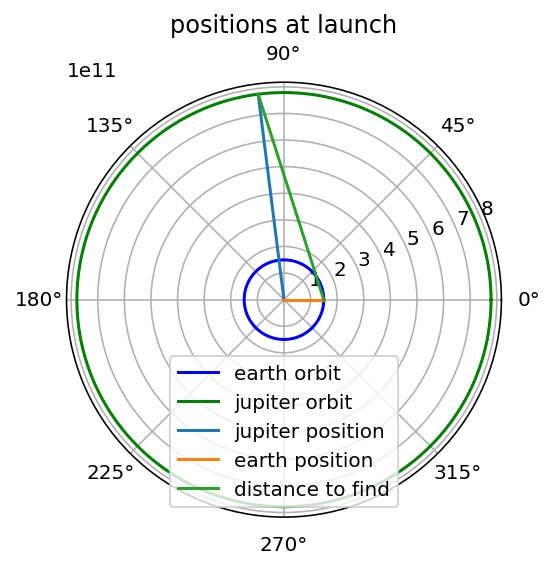

In [9]:
time_constant = ((365.25*tau_e)**2)/((149.59787e9)**3)
tau_j = (time_constant*((r_j)**3))**(1/2)
print(f"jupiter takes {tau_j} seconds for 1 orbit")
print(f"the time on transfer is {time/tau_j} jupiter years")
jupiter_angle = np.pi - (2 * np.pi * time/tau_j)
print(f"jupiter is {jupiter_angle} radians from earth")

plt.polar(*orbit(r_e, 0), color="blue", label="earth orbit")
plt.polar(*orbit(r_j, 0), color="green", label="jupiter orbit")
plt.polar([jupiter_angle, jupiter_angle], [0, r_j], label = "jupiter position")
plt.polar([0, 0], [0, r_e], label = "earth position")
plt.polar([0, jupiter_angle],[r_e, r_j], label = "distance to find")
plt.title("positions at launch")
plt.legend()
distance = ((r_e**2) + (r_j**2) - (2*r_e*r_j) * np.cos(jupiter_angle))**0.5
print(f"{distance}m, so {distance/(1e3*1e8)}e8 km")

q1 is $811909029504.5212m$

In [8]:
a_j = (r_pj + r_aj)/2 # semimajor axis in jupiter science orbit
v_pjs = velocity_elliptical(mu_j, r_pj, a_j) # velocity at perijove for science orbit
dv_insert = V_pj - velocity_elliptical(mu_j, r_pj, a_j) # delta v for insertion into jupiter science orbit
dv_insert

3453.0707500176795

q3 is 3453$ms^{-1}$

In [9]:
burn_mass(dv_insert)

0.6671236939447633

q4 $M_f = 0.67M_o$

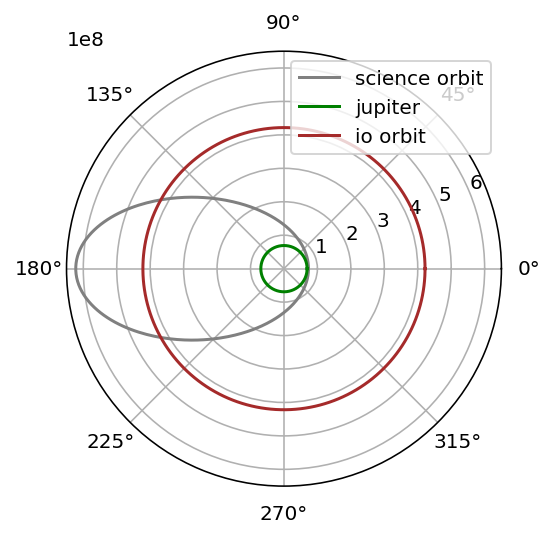

In [10]:
e_j = -(r_pj / a_j)+1
plt.polar(*orbit(a_j, e_j), color="gray", label="science orbit")
plt.polar(*orbit(R_j, 0), color="green", label="jupiter")
plt.polar(*orbit(r_io, 0), color="brown", label="io orbit")
plt.legend()

this shows the jupiter science orbit

In [11]:
a_is = (r_pj + r_ai) / 2 # semimajor axis for io science orbit
e_is = (r_ai / a_is) - 1
v_psi = velocity_elliptical(mu_j, r_pj, a_is) # velocity at perijove for io science orbit

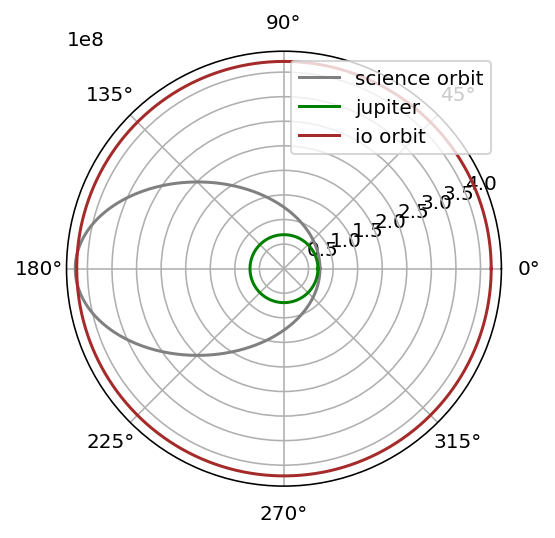

In [12]:
plt.polar(*orbit(a_is, e_is), color="gray", label="science orbit")
plt.polar(*orbit(R_j, 0), color="green", label="jupiter")
plt.polar(*orbit(r_io, 0), color="brown", label="io orbit")
plt.legend()

In [13]:
v_pj = velocity_elliptical(mu_j, r_pj, a_j)
dv_io = v_pj-v_psi
dv_io

1315.260271442421

q6 the maneouver to go from jupiter to io orbit is $1315.3 ms^{-1}$

In [14]:
burn_mass(dv_io)

0.34228228500128444

q7 the fuel burned is $M_f = 0.34M_o$

In [15]:
v_asi = velocity_elliptical(mu_j, r_ai, a_is) # THIS IS NOT THE RIGHT NUMBER
v_asi # velocity at apoapsis for io science mission

9369.602845118932

that seems reasonable, io orbits at $17kms^{-1}$

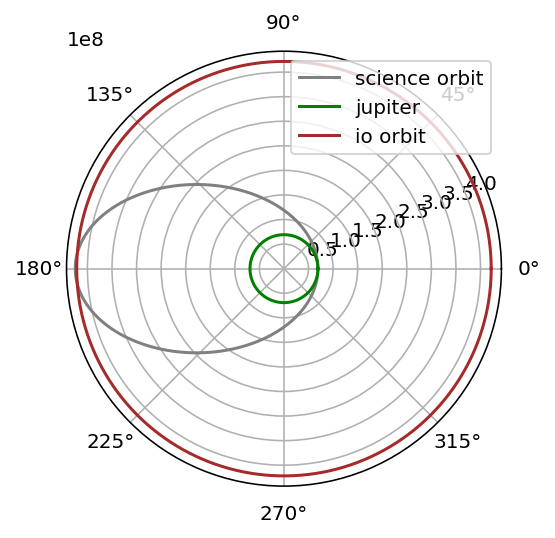

In [16]:
a_d = (r_ai + r_pD)/2 # semimajor axis for the disposal orbit
e_d = (r_ai / a_d) - 1

plt.polar(*orbit(a_d, e_d), color="gray", label="science orbit")
plt.polar(*orbit(R_j, 0), color="green", label="jupiter")
plt.polar(*orbit(r_io, 0), color="brown", label="io orbit")

plt.legend()
v_ad = velocity_elliptical(mu_j, r_ai, a_d) # velocity at apoapsis for the disposal orbit

In [17]:
v_ad

9133.029160054017

In [18]:
dv_d = v_asi - v_ad # delta v for the disposal orbit burn
dv_d

236.57368506491548

q8 is $0.237kms^{-1}$

In [19]:
burn_mass(dv_d)

0.07259149680103712

q9 is $M_f = 0.0726M_o$

In [20]:
final_mass = 550 + 50
mass_before_disposal_burn = final_mass + final_mass * burn_mass(dv_d)
mass_before_io_science_burn = mass_before_disposal_burn + mass_before_disposal_burn * burn_mass(dv_io)
mass_before_jupiter_insertion = mass_before_io_science_burn + mass_before_io_science_burn * burn_mass(dv_insert)
print(f"total mass: {mass_before_jupiter_insertion}kg")

total mass: 1440.1153601417236kg


q10 is $1440kg$

# antenna bit

In [21]:
def find_maximum_bit_rate(B, snr):
    """
    calculates maximum bit rate
    B is the bandwidth in Hz
    snr is the signal to noise ratio
    """
    return B * np.log2(1+snr)

def find_beamwidth(lambda_dish, d):
    """
    calculates the beamwidth of an antenna with the empirical approximation
    lambda_dish is the wavelength used
    d is the diameter of the dish
    """
    return 72*lambda_dish/d

def find_gain(lambda_dish, d, eta = 0.65):
    """
    gain of a parabolic antenna with eta as 0.65 NOT IN dB
    lambda_dish is the wavelength used
    d is the diameter of the dish
    """
    frac = (np.pi * d) / (lambda_dish)
    return eta * frac**2

def find_wavelength(f, c = 3e8):
    """
    finds the wavelength of a signal
    """
    return c/f

def find_dB(value):
    """
    finds a value in decibels
    """
    return 10 * np.log10(value)

def leave_dB(value):
    """
    takes a value out of decibels
    """
    return 10 ** (value/10)

def find_EIRP(P_T, G_T):
    """
    equivalent isotropic radiator power
    """
    return find_dB(P_T*G_T)

def find_GS(G_R, T_R):
    """
    finds ground station figure of merit
    """
    return find_dB(G_R / T_R)

def find_free_space_loss(rho, lambda_s):
    """
    finds free space loss from slant range and wavelength
    """
    return 2*find_dB(4 * np.pi * rho/lambda_s)

boltzmann_const = 1.38e-23
constant = find_dB(boltzmann_const)

<a href="https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=789734">a chart on page 31 gives the figure of merit for 34m DSN antennas</a>
<br>
the figure of merit is at around $51dB$ for the whole range of elevations
<br>
<a href="https://deepspace.jpl.nasa.gov/dsndocs/810-005/205/205D.pdf">a different source</a>
has different gains of around $53-54dB$ for the $34m$ antennas, and includes a FoM of around $61.3dB$ on the $70m$ antennas
juno has a gain of around $45dB$ when it is using the same recievers, but according to <a href="https://descanso.jpl.nasa.gov/DPSummary/Juno_DESCANSO_Post121106H--Compact.pdf"> p57</a> it only needs $18kbps$
<br>
p60-61 say the total $L_A$ is around $2.04$

In [147]:
def power_and_gain(lambda_s, D_ant):
    R_b = 1.5e6
    FoM = 61.3
    rho_max = r_j + r_e
    L_A = 0.05
    
    BER = 1e-6
    errors_per_second = BER * R_b
    E_bN_0 = 10 # from the graph

    cn_0 = find_dB(E_bN_0*R_b)

    L_FS = find_free_space_loss(rho_max, lambda_s)

    EIRP = cn_0 - FoM + L_FS + L_A + constant

    G_T = find_dB(find_gain(lambda_s, D_ant))
    P_T = EIRP-G_T

    return leave_dB(P_T), G_T

In [148]:
f=8.4e9
lambda_s = find_wavelength(f)
D_ant = 4.5
power, gain = power_and_gain(lambda_s, D_ant)
print(f"draws {power}W at a gain of {gain}dB")
print(f"{find_beamwidth(lambda_s, D_ant)}° beamwidth")

draws 162.52492106649171W at a gain of 50.079541922662486dB
0.5714285714285714° beamwidth


290.2790381059702


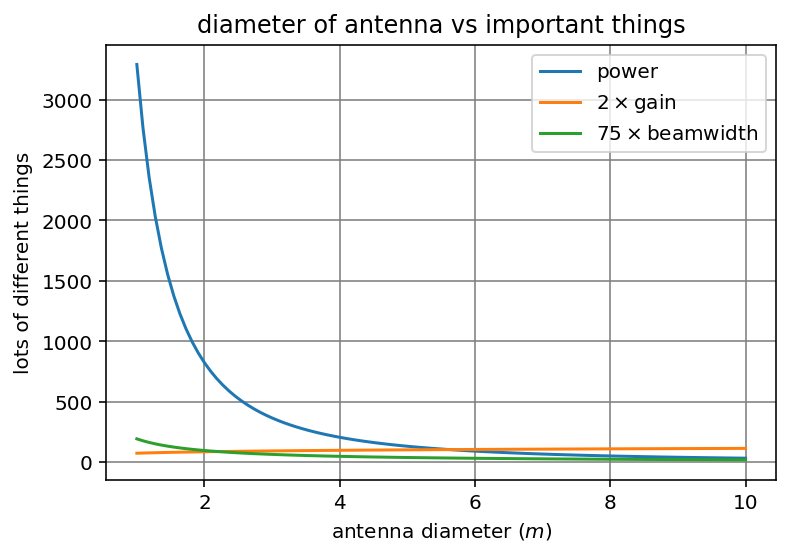

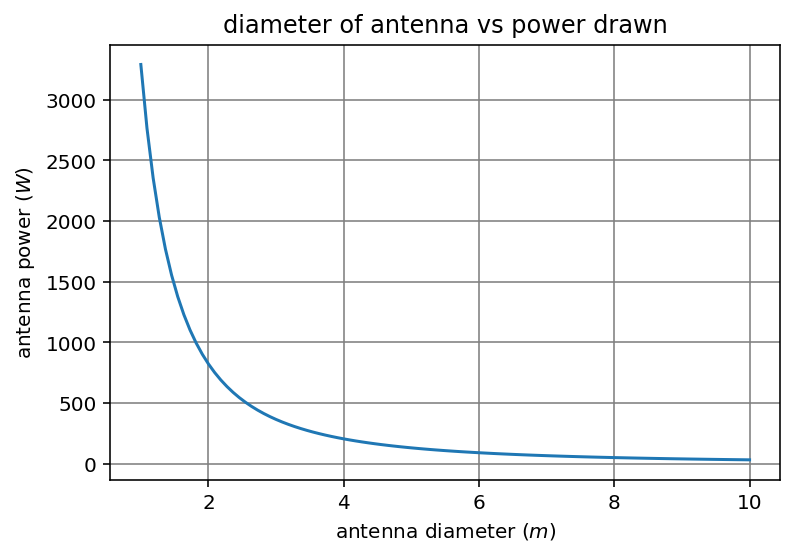

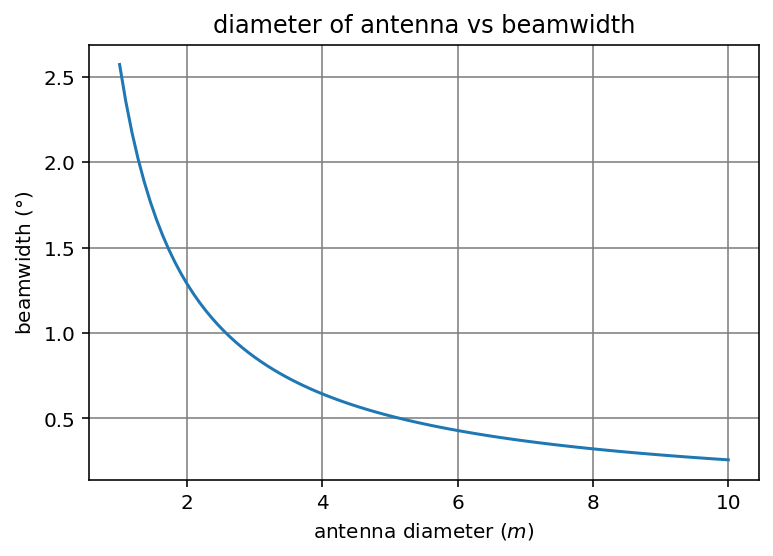

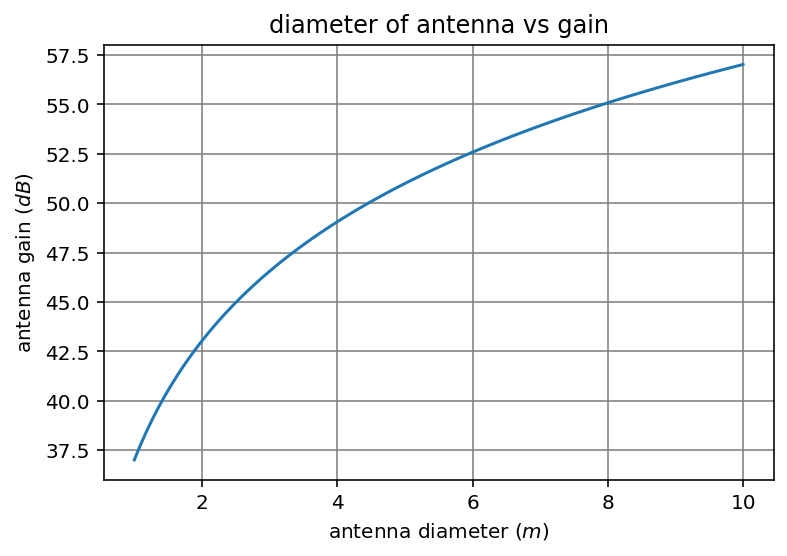

In [127]:
D_ant = np.linspace(1, 10, 100)
power, gain = power_and_gain(lambda_s, D_ant)
beamwidth = find_beamwidth(lambda_s, D_ant)

plt.grid(color="gray")

plt.title("diameter of antenna vs important things")
plt.xlabel("antenna diameter ($m$)")
plt.ylabel("lots of different things")
plt.plot(D_ant, power, label = "power")
plt.plot(D_ant, 2*gain, label = r"$2\times$gain")
plt.plot(D_ant, 75*beamwidth, label = r"$75 \times$beamwidth")
plt.legend()

plt.figure().patch.set_alpha(1)
plt.grid(color="gray")
plt.title("diameter of antenna vs power drawn")
plt.xlabel("antenna diameter ($m$)")
plt.ylabel("antenna power ($W$)")
plt.plot(D_ant, power)
plt.savefig("power.png", transparent = False)

plt.figure().patch.set_alpha(1)
plt.grid(color="gray")
plt.title("diameter of antenna vs beamwidth")
plt.xlabel("antenna diameter ($m$)")
plt.ylabel("beamwidth ($°$)")
plt.plot(D_ant, beamwidth)
plt.savefig("beamwidth.png")

plt.figure().patch.set_alpha(1)
plt.grid(color="gray")
plt.title("diameter of antenna vs gain")
plt.xlabel("antenna diameter ($m$)")
plt.ylabel("antenna gain ($dB$)")
plt.plot(D_ant, gain)
plt.savefig("gain.png")

beamwidth is main constraint, get pointing accuracies from pointing people and then can find power draw
<br>
<a href="https://satsearch.co/products/bradford-coarse-sun-sensor">says accuracies can be as low as $1°$</a>

In [67]:
density_weird = 1.39 # g/cc
density_weird = density_weird / 1e6 # g/m^3
density = density_weird*1e3

In [68]:
d = 5
r = d/2
A = np.pi * r ** 2

In [70]:
A*density+20

20.02729258617806

estimate of the mass:$20.027kg$

In [76]:
D_ant = 9
power, gain = power_and_gain(lambda_s, D_ant)
beamwidth = find_beamwidth(lambda_s, D_ant)
print(f"diameter: {D_ant}\npower: {power}\ngain: {gain}\nbeamwidth: {beamwidth}")

diameter: 9
power: 6.424805319224044
gain: 49.655755941263735
beamwidth: 0.6


In [109]:
find_gain(lambda_s, 70)

24644796.973696172